## Practical Assignment 1 - Mid-term 
#### by David Cushing

This summative assignment aims to implement a neural network to classify images in the Fashion MNIST dataset. You will start by using Stochastic Gradient Descent (SGD), sigmoid activation function and the cross-entropy error function. Then, when you have some results, compare with a number of suggested alternatives. 

The class in the MNIST dataset are as follows: 
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


#### Part 1: Platform preparation, reading data and feature engineering and training
* Download or read the dataset here or from other online sources that you know: Fashion MNIST | Kaggle (You will be asked to create an account, we suggest using your Liverpool account)
*	Split the data to train and test. Feel free to use the Keras code facilities or use your coding. You can view the images to obtain a clearer understanding of the data.   
#### Part 2: Define the model and parameters and start training
*	Use Stochastic Gradient Descent (SGD) optimizer, the Sigmoid Activation function, and the cross-entropy error function, with a two hidden layer fully connected neural network. 
*	Start training the network with epoch=10 and batch size=1000.
*	Obtain the train loss and train accuracy versus test loss and test accuracy.    
#### Part 3: Repeat Part 2 implementing the following: 
*	Replace the Sigmoid Activation function with ReLu and examine the results, explaining why they are better or worse. 
*	Use Dropout regularization and briefly explain the changes to the outcomes. 


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import *

In [2]:
from tensorflow.keras.datasets import fashion_mnist
tf.keras.datasets.fashion_mnist.load_data()


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
## Set up the test and train datasets using the fashion dataset
(train_images_orig, train_labels_orig), (test_images_orig, test_labels_orig) = fashion_mnist.load_data()

In [4]:
## Data Shapes: 
print(train_images_orig.shape)
print(train_labels_orig.shape)
print(test_images_orig.shape)
print(test_labels_orig.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
## Dictionary of the different classes 
class_dict = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

In [6]:
## Import Matplotlib for visuals 
import matplotlib as mpl
import matplotlib.pyplot as plt

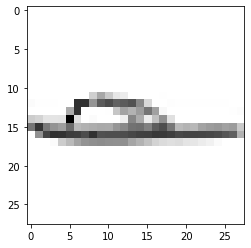

In [7]:
## Image 30: 
item = train_images_orig[30]
plt.imshow(item, cmap=plt.cm.binary)
plt.show()

In [8]:
## Image 30 in number form - with class/label number 
print(train_images_orig[30])
print(train_labels_orig[30])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

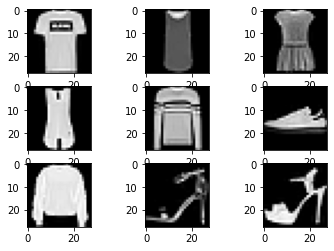

In [9]:
## 3x3 of 9 different images 
for i in range(1, 10):
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(train_images_orig[i], cmap=plt.get_cmap('gray'))
 
# Display the entire plot
plt.show()

The image pixels are between 0-255 - white to black.    
We need to scale the data between 0-1 - so we can devide each array by 255.  

In [10]:
### Preparing the image data - divide by 255 to give values between 0-1
#train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images_orig.astype("float32") / 255 
#test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images_orig.astype("float32") / 255
train_labels = train_labels_orig
test_labels = test_labels_orig


In [11]:
## Add an extra dim 
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
print(train_images.shape) 
print(train_labels.shape)

(60000, 28, 28, 1)
(60000,)


#### Model:    
Use Stochastic Gradient Descent (SGD) optimizer, the Sigmoid Activation function, and the cross-entropy error function, with a two hidden layer fully connected neural network. 
*	Start training the network with epoch=10 and batch size=1000.
*	Obtain the train loss and train accuracy versus test loss and test accuracy.


In [12]:
### Set up model 1 function 
def mod1_create(a,b):
    model = keras.Sequential()
    ## Flattern layer to create FNN 
    model.add(Flatten(input_shape=(28,28,1)))       # Input layer
    ### Add an input layer - hidden layer 1:
    model.add(Dense(a,                            # Number of nodes
                activation="sigmoid",               # Activation function
                name='Hidden-Layer-1'))             # Name of layer
    ### Add a second hidden layer: 
    model.add(Dense(b,                            # Number of nodes
                activation="sigmoid",               # Activation function
                name='Hidden-Layer-2'))             # Name of layer
    ### Add an output layer:
    model.add(Dense(10, 
                activation="softmax",   
                name='Output-layer-1'))
    return model



In [13]:
## 
model1 = mod1_create(784,64)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 784)               615440    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                50240     
                                                                 
 Output-layer-1 (Dense)      (None, 10)                650       
                                                                 
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________


Here we can use the cross entropy error function....   
sparse_categorical_crossentropy or categorical cross entropy:      
"categorical_crossentropy ( cce ) produces a one-hot array containing the probable match for each category, sparse_categorical_crossentropy ( scce ) produces a category index of the most likely matching category"   
For this example we can use sparse_categorical_crossentropy as the labels are integer encoded ....        

In [14]:
## Define the no of epochs and batch size 
epochs=10 
batch_size=1000

### Compiling: 
model1.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
### Fitting the model:
model1.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)


Epoch 1/10
60/60 [==============================] - 2s 30ms/step - loss: 2.3500 - accuracy: 0.0615
Epoch 2/10
60/60 [==============================] - 2s 28ms/step - loss: 2.2658 - accuracy: 0.2470
Epoch 3/10
60/60 [==============================] - 2s 29ms/step - loss: 2.2429 - accuracy: 0.4074
Epoch 4/10
60/60 [==============================] - 2s 29ms/step - loss: 2.2199 - accuracy: 0.4677
Epoch 5/10
60/60 [==============================] - 1s 24ms/step - loss: 2.1957 - accuracy: 0.5169
Epoch 6/10
60/60 [==============================] - 2s 25ms/step - loss: 2.1703 - accuracy: 0.5505
Epoch 7/10
60/60 [==============================] - 2s 26ms/step - loss: 2.1435 - accuracy: 0.5559
Epoch 8/10
60/60 [==============================] - 2s 26ms/step - loss: 2.1151 - accuracy: 0.5727
Epoch 9/10
60/60 [==============================] - 2s 25ms/step - loss: 2.0852 - accuracy: 0.5634
Epoch 10/10
60/60 [==============================] - 2s 32ms/step - loss: 2.0537 - accuracy: 0.5862


Use this code to output the model: 

In [15]:
from pathlib import Path
## Save the model:
## model_structure = model.to_json()
## f = Path("model_structure.json")
## f.write_text(model_structure)
## Save the network training weights: 
## model.save_weights("model_weights.h5")

### Obtain the train loss and train accuracy versus test loss and test accuracy.

In [16]:
### If you run the model.fit again - you ge the next ten epochs!!
### Recreate the model to get this to work accuately .... 
### history = model.fit(train_images, train_labels, epochs=10, batch_size=1000)

Loss and accuracy are the two outputs from the evalutaion function: 

In [17]:
## Evaluate the model --- does it give the same output?? 
score1train = model1.evaluate(train_images, train_labels, verbose=0)
print('Train loss:', score1train[0])
print('Train accuracy:', score1train[1])

Train loss: 2.0369794368743896
Train accuracy: 0.5752833485603333


In [18]:
## Evaluate the model --- does it give the same output?? 
score1test = model1.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score1test[0])
print('Test accuracy:', score1test[1])
## Quick QC of the outputs: 
print(model1.metrics_names)
print(score1test)

Test loss: 2.0382347106933594
Test accuracy: 0.5771999955177307
['loss', 'accuracy']
[2.0382347106933594, 0.5771999955177307]


#### Repeat the fit method, this time - let's get some graphs ... 

Here we'll use the test data and label for validation stats during training: 

In [19]:
model1b = mod1_create(784,64)

model1b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 784)               615440    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                50240     
                                                                 
 Output-layer-1 (Dense)      (None, 10)                650       
                                                                 
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________


In [20]:
### Compiling: 
model1b.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
### Fitting the model:
history = model1b.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))


Epoch 1/10
60/60 [==============================] - 2s 27ms/step - loss: 2.3543 - accuracy: 0.1692 - val_loss: 2.2877 - val_accuracy: 0.1998
Epoch 2/10
60/60 [==============================] - 1s 24ms/step - loss: 2.2728 - accuracy: 0.2437 - val_loss: 2.2613 - val_accuracy: 0.2983
Epoch 3/10
60/60 [==============================] - 1s 24ms/step - loss: 2.2523 - accuracy: 0.3462 - val_loss: 2.2432 - val_accuracy: 0.4056
Epoch 4/10
60/60 [==============================] - 1s 24ms/step - loss: 2.2340 - accuracy: 0.4253 - val_loss: 2.2246 - val_accuracy: 0.4376
Epoch 5/10
60/60 [==============================] - 1s 23ms/step - loss: 2.2149 - accuracy: 0.4504 - val_loss: 2.2050 - val_accuracy: 0.4473
Epoch 6/10
60/60 [==============================] - 1s 23ms/step - loss: 2.1945 - accuracy: 0.4628 - val_loss: 2.1842 - val_accuracy: 0.4876
Epoch 7/10
60/60 [==============================] - 1s 23ms/step - loss: 2.1729 - accuracy: 0.4890 - val_loss: 2.1618 - val_accuracy: 0.4854
Epoch 8/10
60

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


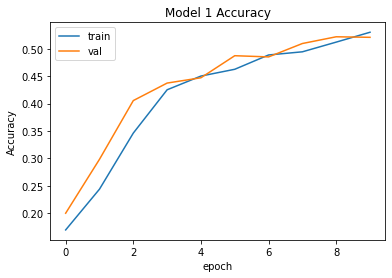

In [22]:
# Accuracy vs Epoch plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

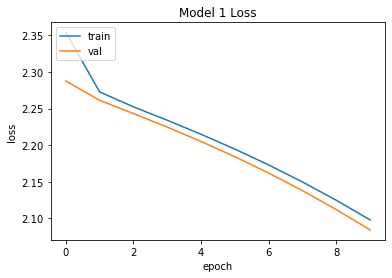

In [23]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
## Evaluate the model --- does it give the same output?? 
score1btrain = model1b.evaluate(train_images, train_labels, verbose=0)
print('Train loss:', score1btrain[0])
print('Train accuracy:', score1btrain[1])

Train loss: 2.083264112472534
Train accuracy: 0.5245333313941956


In [25]:
## Evaluate the model --- does it give the same output?? 
score1btest = model1b.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score1btest[0])
print('Test accuracy:', score1btest[1])
## Quick QC of the outputs: 
print(model1b.metrics_names)
print(score1btest)

Test loss: 2.0840868949890137
Test accuracy: 0.5212000012397766
['loss', 'accuracy']
[2.0840868949890137, 0.5212000012397766]


#### QC of First model results : 

In [26]:
import pandas as pd

In [27]:
print(train_images.shape) 
print(train_labels.shape)
print(test_images.shape) 
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [28]:
df_mod_res = pd.DataFrame(columns =['image_no','predict','actual'])
imageno = []
preds = []
actual = []
## test_digits = test_images
predictions = model1b.predict(test_images)
print(predictions.shape)
for i in range(100, 10000, 100):
    preds.append(np.argmax(predictions[i]))
    print(f"Image number {i} is most likely to be: ", (np.argmax(predictions[i])))
    imageno.append(i)
    print(f"Image number {i} actually is:", test_labels[i])
    actual.append(test_labels[i])


313/313 [==============================] - 1s 3ms/step
(10000, 10)
Image number 100 is most likely to be:  1
Image number 100 actually is: 3
Image number 200 is most likely to be:  1
Image number 200 actually is: 1
Image number 300 is most likely to be:  1
Image number 300 actually is: 3
Image number 400 is most likely to be:  0
Image number 400 actually is: 0
Image number 500 is most likely to be:  2
Image number 500 actually is: 2
Image number 600 is most likely to be:  5
Image number 600 actually is: 2
Image number 700 is most likely to be:  4
Image number 700 actually is: 8
Image number 800 is most likely to be:  9
Image number 800 actually is: 7
Image number 900 is most likely to be:  8
Image number 900 actually is: 8
Image number 1000 is most likely to be:  0
Image number 1000 actually is: 0
Image number 1100 is most likely to be:  2
Image number 1100 actually is: 4
Image number 1200 is most likely to be:  5
Image number 1200 actually is: 5
Image number 1300 is most likely to be:

Each number of index i in that array corresponds to the probability that digit image test_digits[0] belongs to class i.   
   
This first test digit has the highest probability score (0.1443) at index 9, so according to our model, it should be a 9:

In [29]:
print(imageno)
print(actual)
print(preds)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900]
[3, 1, 3, 0, 2, 2, 8, 7, 8, 0, 4, 5, 8, 4, 3, 7, 1, 1, 8, 8, 7, 1, 6, 8, 6, 7, 7, 1, 3, 1, 0, 5, 9, 7, 0, 8, 6, 6, 6, 0, 2, 4, 2, 8, 4, 0, 8, 9, 8, 2, 4, 5, 1, 0, 7, 9, 5, 7, 8, 1, 1, 4, 7, 4, 4, 8, 6, 3, 9, 8, 7, 0, 9, 1, 5, 7, 1, 6, 5, 7, 4, 1, 4, 1, 2, 8, 7, 4, 1, 6, 0, 2, 2, 6, 8, 2, 3, 8, 6]
[1, 1, 1, 0, 2, 5, 4, 9, 8, 0, 2, 5, 5, 3, 1, 5, 1, 1, 8, 7, 7, 1, 2, 7, 4, 7, 5, 1, 0, 1, 0, 5, 9, 7, 0, 8, 0, 5, 2

We can graphically check that the test labels agree with the predicted labels:  

In [30]:
df_mod_res['image_no'] = imageno
df_mod_res['predict'] = preds
df_mod_res['actual'] = actual
df_mod_res = df_mod_res.set_index('image_no')
df_mod_res.head(10)

,predict,actual
image_no,,
100,1,3
200,1,1
300,1,3
400,0,0
500,2,2
600,5,2
700,4,8
800,9,7
900,8,8


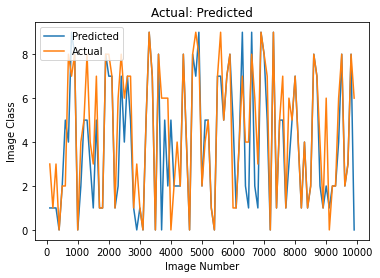

In [31]:
### Plot the Actual and predicted: 

plt.plot (df_mod_res['predict'])
plt.plot (df_mod_res['actual'])
plt.xticks(range(0,11000,1000))
plt.title('Actual: Predicted')
plt.ylabel('Image Class')
plt.xlabel('Image Number')
plt.legend(['Predicted', 'Actual'] , loc='upper left')
plt.show()


On average, how good is our model at classifying such never-before-seen digits? Let’s check by computing average accuracy over the entire test set.

In [32]:
test_loss, test_acc = model1b.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


313/313 [==============================] - 1s 3ms/step - loss: 2.0841 - accuracy: 0.5212
test_acc: 0.5212000012397766


The test-set accuracy turns out to be 57.81% - this is more than the training accuracy of 54.87%. Therefore .... 

In [33]:
### Use the model to make predictions: 
test_digits = test_images[0:200]
predictions = model1b.predict(test_digits)
predictions[100]

7/7 [==============================] - 0s 3ms/step


array([0.10689496, 0.12818924, 0.09865183, 0.12047202, 0.08898862,
       0.09077973, 0.09001696, 0.09584951, 0.09227845, 0.08787867],
      dtype=float32)

Each number of index i in that array corresponds to the probability that digit image test_digits[100] belongs to class i.    
  
The highest value is for 1 .....  12.81%

In [34]:
predictions[100].argmax() 
predictions[100][3] 


0.12047202

Check to see whether prediction of 3 is good: 

In [35]:
print(test_labels[100])
print(class_dict.get(test_labels[100])) 

3
Dress


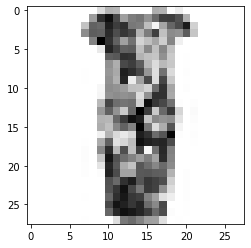

In [36]:
### This should give us a picture of a dress .... 
item = test_images_orig[100]
plt.imshow(item, cmap=plt.cm.binary)
plt.show()

Well, the model didn't predict a dress....

On average, how good is our model at classifying such never-before-seen digits? Let’s check by computing average accuracy over the entire test set.

In [37]:
test_loss, test_acc = model1b.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


313/313 [==============================] - 1s 3ms/step - loss: 2.0841 - accuracy: 0.5212
test_acc: 0.5212000012397766


### Test Model 2: Repeat but with Sigmoid Function replaced with ReLU

In [38]:
### Set up model function 
def mod2_create(a,b):
    model2 = keras.Sequential()
    model2.add(Flatten(input_shape=(28,28,1)))       # Input layer
    ### Add an input layer - hidden layer 1:
    model2.add(Dense(a,                            # Number of neurons
                activation="ReLU",               # Activation function
                name='Hidden-Layer-1'))             # Name of layer
    ### Add a second hidden layer: 
    model2.add(Dense(b,                            # Number of neurons
                activation="ReLU",               # Activation function
                name='Hidden-Layer-2'))             # Name of layer
    ### Add an output layer:
    model2.add(Dense(10, 
                activation="softmax",   
                name='Output-layer-1'))
    return model2



In [39]:
model2 = mod2_create(784,64)

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 784)               615440    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                50240     
                                                                 
 Output-layer-1 (Dense)      (None, 10)                650       
                                                                 
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________


In [40]:
### Compiling: 
model2.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
### Fitting the model:
model2.fit(train_images, train_labels, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 2s 20ms/step - loss: 1.7766 - accuracy: 0.4969
Epoch 2/10
60/60 [==============================] - 1s 19ms/step - loss: 1.2165 - accuracy: 0.6566
Epoch 3/10
60/60 [==============================] - 1s 20ms/step - loss: 0.9931 - accuracy: 0.6979
Epoch 4/10
60/60 [==============================] - 1s 20ms/step - loss: 0.8772 - accuracy: 0.7278
Epoch 5/10
60/60 [==============================] - 1s 21ms/step - loss: 0.8037 - accuracy: 0.7496
Epoch 6/10
60/60 [==============================] - 1s 24ms/step - loss: 0.7518 - accuracy: 0.7647
Epoch 7/10
60/60 [==============================] - 1s 22ms/step - loss: 0.7125 - accuracy: 0.7757
Epoch 8/10
60/60 [==============================] - 1s 21ms/step - loss: 0.6815 - accuracy: 0.7842
Epoch 9/10
60/60 [==============================] - 1s 21ms/step - loss: 0.6564 - accuracy: 0.7903
Epoch 10/10
60/60 [==============================] - 1s 21ms/step - loss: 0.6352 - accuracy: 0.7958


In [41]:
## Evaluate the model --- does it give the same output?? 
score2train = model2.evaluate(train_images, train_labels, verbose=0)
print('Train loss:', score2train[0])
print('Train accuracy:', score2train[1])

Train loss: 0.6258437633514404
Train accuracy: 0.7982333302497864


In [42]:
## Evaluate the model --- does it give the same output?? 
score2test = model2.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score2test[0])
print('Test accuracy:', score2test[1])
## Quick QC of the outputs: 
print(model2.metrics_names)
print(score2test)

Test loss: 0.6442720890045166
Test accuracy: 0.7870000004768372
['loss', 'accuracy']
[0.6442720890045166, 0.7870000004768372]


Resetting the model: 

In [43]:
model2b = mod2_create(784,64)

model2b.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 784)               615440    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                50240     
                                                                 
 Output-layer-1 (Dense)      (None, 10)                650       
                                                                 
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________


In [44]:
### Compiling: 
model2b.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
### Fitting the model:
history2b = model2b.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))

Epoch 1/10
60/60 [==============================] - 2s 24ms/step - loss: 1.9192 - accuracy: 0.4523 - val_loss: 1.5501 - val_accuracy: 0.6235
Epoch 2/10
60/60 [==============================] - 1s 22ms/step - loss: 1.3141 - accuracy: 0.6580 - val_loss: 1.1425 - val_accuracy: 0.6778
Epoch 3/10
60/60 [==============================] - 1s 21ms/step - loss: 1.0346 - accuracy: 0.6950 - val_loss: 0.9624 - val_accuracy: 0.6957
Epoch 4/10
60/60 [==============================] - 1s 23ms/step - loss: 0.9008 - accuracy: 0.7163 - val_loss: 0.8674 - val_accuracy: 0.7144
Epoch 5/10
60/60 [==============================] - 1s 22ms/step - loss: 0.8227 - accuracy: 0.7377 - val_loss: 0.8052 - val_accuracy: 0.7350
Epoch 6/10
60/60 [==============================] - 1s 21ms/step - loss: 0.7696 - accuracy: 0.7535 - val_loss: 0.7631 - val_accuracy: 0.7488
Epoch 7/10
60/60 [==============================] - 1s 22ms/step - loss: 0.7300 - accuracy: 0.7667 - val_loss: 0.7282 - val_accuracy: 0.7627
Epoch 8/10
60

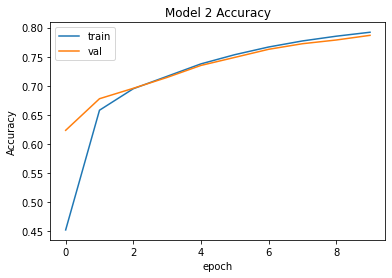

In [45]:
# Accuracy vs Epoch plot
plt.plot(history2b.history['accuracy'])
plt.plot(history2b.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

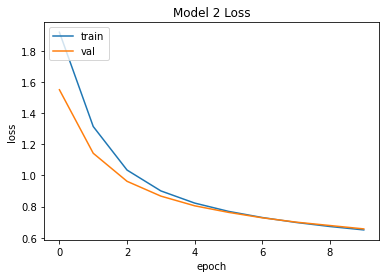

In [46]:
# Loss vs Epoch plot
plt.plot(history2b.history['loss'])
plt.plot(history2b.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### QC of Second model results : 

In [47]:
df_mod_res2 = pd.DataFrame(columns =['image_no','predict','actual'])
imageno2 = []
preds2 = []
actual2 = []
## test_digits = test_images
predictions2 = model2b.predict(test_images)
print(predictions2.shape)
for i in range(100, 10000, 100):
    preds2.append(np.argmax(predictions2[i]))
    print(f"Image number {i} is most likely to be: ", (np.argmax(predictions2[i])))
    imageno2.append(i)
    print(f"Image number {i} actually is:", test_labels[i])
    actual2.append(test_labels[i])


313/313 [==============================] - 1s 3ms/step
(10000, 10)
Image number 100 is most likely to be:  3
Image number 100 actually is: 3
Image number 200 is most likely to be:  1
Image number 200 actually is: 1
Image number 300 is most likely to be:  3
Image number 300 actually is: 3
Image number 400 is most likely to be:  0
Image number 400 actually is: 0
Image number 500 is most likely to be:  2
Image number 500 actually is: 2
Image number 600 is most likely to be:  2
Image number 600 actually is: 2
Image number 700 is most likely to be:  8
Image number 700 actually is: 8
Image number 800 is most likely to be:  9
Image number 800 actually is: 7
Image number 900 is most likely to be:  8
Image number 900 actually is: 8
Image number 1000 is most likely to be:  0
Image number 1000 actually is: 0
Image number 1100 is most likely to be:  2
Image number 1100 actually is: 4
Image number 1200 is most likely to be:  5
Image number 1200 actually is: 5
Image number 1300 is most likely to be:

In [48]:
df_mod_res2['image_no'] = imageno2
df_mod_res2['predict'] = preds2
df_mod_res2['actual'] = actual2
df_mod_res2 = df_mod_res2.set_index('image_no')
df_mod_res2.head(10)

,predict,actual
image_no,,
100,3,3
200,1,1
300,3,3
400,0,0
500,2,2
600,2,2
700,8,8
800,9,7
900,8,8


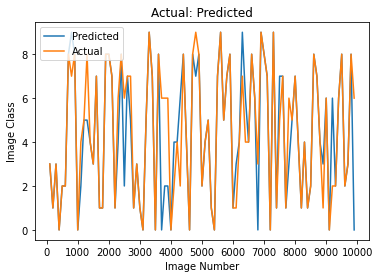

In [49]:
### Plot the Actual and predicted: 

plt.plot (df_mod_res2['predict'])
plt.plot (df_mod_res2['actual'])
plt.xticks(range(0,11000,1000))
plt.title('Actual: Predicted')
plt.ylabel('Image Class')
plt.xlabel('Image Number')
plt.legend(['Predicted', 'Actual'] , loc='upper left')
plt.show()


In [50]:
## Evaluate the model --- does it give the same output?? 
score2btrain = model2b.evaluate(train_images, train_labels, verbose=0)
print('Train loss:', score2btrain[0])
print('Train accuracy:', score2btrain[1])

Train loss: 0.6399388909339905
Train accuracy: 0.7954999804496765


In [51]:
## Evaluate the model --- does it give the same output?? 
score2btest = model2b.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score2btest[0])
print('Test accuracy:', score2btest[1])
## Quick QC of the outputs: 
print(model2b.metrics_names)
print(score2btest)

Test loss: 0.657042920589447
Test accuracy: 0.7867000102996826
['loss', 'accuracy']
[0.657042920589447, 0.7867000102996826]


### Test Model 3: Repeat but with Dropout regularization 

In [52]:
### Set up model function 
def mod3_create(a,b,c):
    model3 = keras.Sequential()
    model3.add(Flatten(input_shape=(28,28,1)))       # Input layer
    ### Add an input layer - hidden layer 1:
    model3.add(Dense(a,                             # Number of neurons
                activation="ReLU",                  # Activation function
                name='Hidden-Layer-1'))             # Name of layer
    ### Add a dropout reg layer: 
    model3.add(Dropout(c)) 
    ### Add a second hidden layer: 
    model3.add(Dense(b,                             # Number of neurons
                activation="ReLU",                  # Activation function
                name='Hidden-Layer-2'))             # Name of layer
    ### Add an output layer:
    model3.add(Dense(10, 
                activation="softmax",   
                name='Output-layer-1'))
    return model3



In [53]:
model3 = mod3_create(784,64,0.25)

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 784)               615440    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                50240     
                                                                 
 Output-layer-1 (Dense)      (None, 10)                650       
                                                                 
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________


In [54]:
### Compiling: 
model3.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
### Fitting the model:
model3.fit(train_images, train_labels, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 2s 30ms/step - loss: 1.8571 - accuracy: 0.3816
Epoch 2/10
60/60 [==============================] - 2s 32ms/step - loss: 1.2433 - accuracy: 0.6344
Epoch 3/10
60/60 [==============================] - 2s 35ms/step - loss: 1.0017 - accuracy: 0.6880
Epoch 4/10
60/60 [==============================] - 2s 35ms/step - loss: 0.8817 - accuracy: 0.7152
Epoch 5/10
60/60 [==============================] - 2s 32ms/step - loss: 0.8108 - accuracy: 0.7354
Epoch 6/10
60/60 [==============================] - 2s 39ms/step - loss: 0.7624 - accuracy: 0.7495
Epoch 7/10
60/60 [==============================] - 2s 41ms/step - loss: 0.7254 - accuracy: 0.7613
Epoch 8/10
60/60 [==============================] - 2s 39ms/step - loss: 0.6978 - accuracy: 0.7677
Epoch 9/10
60/60 [==============================] - 2s 36ms/step - loss: 0.6764 - accuracy: 0.7735
Epoch 10/10
60/60 [==============================] - 2s 29ms/step - loss: 0.6546 - accuracy: 0.7821


In [55]:
## Evaluate the model --- does it give the same output?? 
score3train = model3.evaluate(train_images, train_labels, verbose=0)
print('Train loss:', score3train[0])
print('Train accuracy:', score3train[1])

Train loss: 0.6044987440109253
Train accuracy: 0.8039000034332275


In [56]:
## Evaluate the model --- does it give the same output?? 
score3test = model3.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score3test[0])
print('Test accuracy:', score3test[1])
## Quick QC of the outputs: 
print(model3.metrics_names)
print(score3test)

Test loss: 0.6231289505958557
Test accuracy: 0.7926999926567078
['loss', 'accuracy']
[0.6231289505958557, 0.7926999926567078]


Resetting the model: 

In [57]:
model3b = mod3_create(784,64,0.25)

model3b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 784)               615440    
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                50240     
                                                                 
 Output-layer-1 (Dense)      (None, 10)                650       
                                                                 
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________


In [58]:
### Compiling: 
model3b.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
### Fitting the model:
history3b = model3b.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))

Epoch 1/10
60/60 [==============================] - 2s 32ms/step - loss: 1.9419 - accuracy: 0.3946 - val_loss: 1.5355 - val_accuracy: 0.6359
Epoch 2/10
60/60 [==============================] - 2s 30ms/step - loss: 1.3472 - accuracy: 0.6280 - val_loss: 1.1149 - val_accuracy: 0.6757
Epoch 3/10
60/60 [==============================] - 2s 29ms/step - loss: 1.0539 - accuracy: 0.6783 - val_loss: 0.9299 - val_accuracy: 0.7013
Epoch 4/10
60/60 [==============================] - 2s 33ms/step - loss: 0.9142 - accuracy: 0.7050 - val_loss: 0.8339 - val_accuracy: 0.7235
Epoch 5/10
60/60 [==============================] - 2s 29ms/step - loss: 0.8368 - accuracy: 0.7244 - val_loss: 0.7756 - val_accuracy: 0.7434
Epoch 6/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7825 - accuracy: 0.7426 - val_loss: 0.7339 - val_accuracy: 0.7529
Epoch 7/10
60/60 [==============================] - 2s 30ms/step - loss: 0.7421 - accuracy: 0.7529 - val_loss: 0.7028 - val_accuracy: 0.7623
Epoch 8/10
60

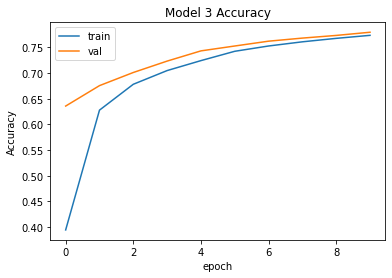

In [59]:
# Accuracy vs Epoch plot
plt.plot(history3b.history['accuracy'])
plt.plot(history3b.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

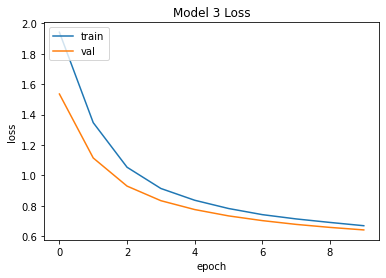

In [60]:
# Loss vs Epoch plot
plt.plot(history3b.history['loss'])
plt.plot(history3b.history['val_loss'])
plt.title('Model 3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [61]:
df_mod_res3 = pd.DataFrame(columns =['image_no','predict','actual'])
imageno3 = []
preds3 = []
actual3 = []
## test_digits = test_images
predictions3 = model3b.predict(test_images)
print(predictions3.shape)
for i in range(100, 10000, 100):
    preds3.append(np.argmax(predictions3[i]))
    print(f"Image number {i} is most likely to be: ", (np.argmax(predictions3[i])))
    imageno3.append(i)
    print(f"Image number {i} actually is:", test_labels[i])
    actual3.append(test_labels[i])


313/313 [==============================] - 1s 3ms/step
(10000, 10)
Image number 100 is most likely to be:  3
Image number 100 actually is: 3
Image number 200 is most likely to be:  1
Image number 200 actually is: 1
Image number 300 is most likely to be:  3
Image number 300 actually is: 3
Image number 400 is most likely to be:  0
Image number 400 actually is: 0
Image number 500 is most likely to be:  2
Image number 500 actually is: 2
Image number 600 is most likely to be:  2
Image number 600 actually is: 2
Image number 700 is most likely to be:  8
Image number 700 actually is: 8
Image number 800 is most likely to be:  9
Image number 800 actually is: 7
Image number 900 is most likely to be:  8
Image number 900 actually is: 8
Image number 1000 is most likely to be:  0
Image number 1000 actually is: 0
Image number 1100 is most likely to be:  2
Image number 1100 actually is: 4
Image number 1200 is most likely to be:  5
Image number 1200 actually is: 5
Image number 1300 is most likely to be:

In [62]:
df_mod_res3['image_no'] = imageno3
df_mod_res3['predict'] = preds3
df_mod_res3['actual'] = actual3
df_mod_res3 = df_mod_res3.set_index('image_no')
df_mod_res3.head(10)

,predict,actual
image_no,,
100,3,3
200,1,1
300,3,3
400,0,0
500,2,2
600,2,2
700,8,8
800,9,7
900,8,8


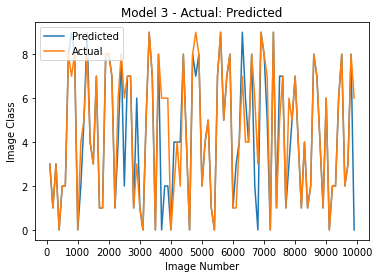

In [63]:
### Plot the Actual and predicted: 

plt.plot (df_mod_res3['predict'])
plt.plot (df_mod_res3['actual'])
plt.xticks(range(0,11000,1000))
plt.title('Model 3 - Actual: Predicted')
plt.ylabel('Image Class')
plt.xlabel('Image Number')
plt.legend(['Predicted', 'Actual'] , loc='upper left')
plt.show()


In [64]:
## Evaluate the model --- does it give the same output?? 
score3btrain = model3b.evaluate(train_images, train_labels, verbose=0)
print('Train loss:', score3btrain[0])
print('Train accuracy:', score3btrain[1])

Train loss: 0.6204751133918762
Train accuracy: 0.79503333568573


In [65]:
## Evaluate the model --- does it give the same output?? 
score3btest = model3b.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score3btest[0])
print('Test accuracy:', score3btest[1])
## Quick QC of the outputs: 
print(model3b.metrics_names)
print(score3btest)

Test loss: 0.6416292786598206
Test accuracy: 0.779699981212616
['loss', 'accuracy']
[0.6416292786598206, 0.779699981212616]


#### Joint Comparison Graphs 

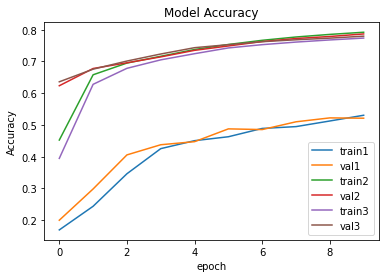

In [66]:
# Accuracy vs Epoch plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2b.history['accuracy'])
plt.plot(history2b.history['val_accuracy'])
plt.plot(history3b.history['accuracy'])
plt.plot(history3b.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train1', 'val1', 'train2', 'val2', 'train3', 'val3'], loc='lower right')
plt.show()

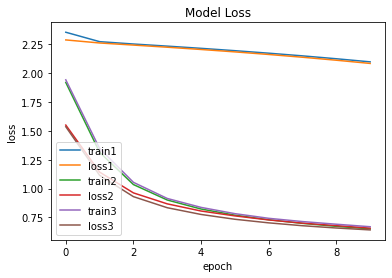

In [67]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2b.history['loss'])
plt.plot(history2b.history['val_loss'])
plt.plot(history3b.history['loss'])
plt.plot(history3b.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1', 'loss1', 'train2', 'loss2', 'train3', 'loss3'], loc='lower left')
plt.show()

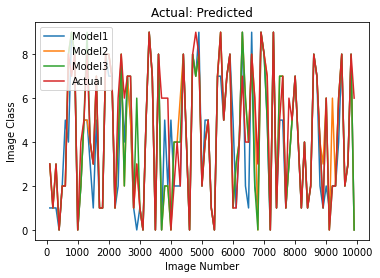

In [68]:
### Plot the Actual and predicted: 

plt.plot (df_mod_res['predict'])
plt.plot (df_mod_res2['predict'])
plt.plot (df_mod_res3['predict'])
plt.plot (df_mod_res3['actual'])
plt.xticks(range(0,11000,1000))
plt.title('Actual: Predicted')
plt.ylabel('Image Class')
plt.xlabel('Image Number')
plt.legend(['Model1', 'Model2', 'Model3', 'Actual'] , loc='upper left')
plt.show()


Check to see the difference between each model for indiviual data examples: 

In [69]:
df_mod_diff = pd.DataFrame(columns =['actual', 'diff12', 'diff13', 'diff23'])

df_mod_diff['actual'] = df_mod_res3['actual']
df_mod_diff['diff12'] = df_mod_res['predict'] - df_mod_res2['predict']
df_mod_diff['diff13'] = df_mod_res['predict'] - df_mod_res3['predict']
df_mod_diff['diff23'] = df_mod_res2['predict'] - df_mod_res3['predict']

df_mod_diff.head(10)


,actual,diff12,diff13,diff23
image_no,,,,
100,3,-2,-2,0
200,1,0,0,0
300,3,-2,-2,0
400,0,0,0,0
500,2,0,0,0
600,2,3,3,0
700,8,-4,-4,0
800,7,0,0,0
900,8,0,0,0


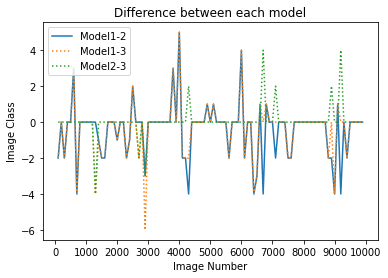

In [70]:
plt.plot (df_mod_diff['diff12'])
plt.plot (df_mod_diff['diff13'], linestyle=':')
plt.plot (df_mod_diff['diff23'], linestyle=':')
## plt.plot (df_mod_diff['actual'])
plt.xticks(range(0,11000,1000))
plt.title('Difference between each model')
plt.ylabel('Image Class')
plt.xlabel('Image Number')
plt.legend(['Model1-2', 'Model1-3', 'Model2-3'] , loc='upper left')
plt.show()

Accuracy and loss plots ... 

In [71]:
df_losacc = pd.DataFrame(index =['1', '1b', '2', '2b', '3', '3b'], columns =['train_loss','train_acc','test_loss', 'test_acc'])

loss1 = [score1train[0],score1btrain[0], score2train[0], score2btrain[0], score3train[0], score3btrain[0] ]
acc1 = [score1train[1],score1btrain[1], score2train[1], score2btrain[1], score3train[1], score3btrain[1] ]
loss2 = [score1test[0],score1btest[0], score2test[0], score2btest[0], score3test[0], score3btest[0] ]
acc2 = [score1test[1],score1btest[1], score2test[1], score2btest[1], score3test[1], score3btest[1] ]

df_losacc['train_loss'] = loss1 
df_losacc['train_acc'] = acc1
df_losacc['test_loss'] = loss2
df_losacc['test_acc'] = acc2

In [72]:
print(loss1)
print(loss2)

[2.0369794368743896, 2.083264112472534, 0.6258437633514404, 0.6399388909339905, 0.6044987440109253, 0.6204751133918762]
[2.0382347106933594, 2.0840868949890137, 0.6442720890045166, 0.657042920589447, 0.6231289505958557, 0.6416292786598206]


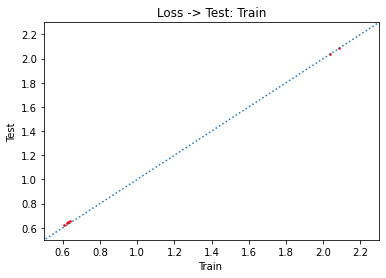

In [73]:
# dataset-1
x1 = df_losacc['train_loss']
y1 = df_losacc['test_loss']
 
# dataset2
x2 = df_losacc['train_acc']
y2 = df_losacc['test_acc']

x3 = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
y3 = x3
plt.scatter(x1, y1, c ="red", marker =".", s = 10)

plt.plot (x3, y3, linestyle=':') 
plt.xlim([0.5, 2.3])
plt.ylim([0.5, 2.3])
plt.title('Loss -> Test: Train')
plt.xlabel("Train ")
plt.ylabel("Test")
plt.show()

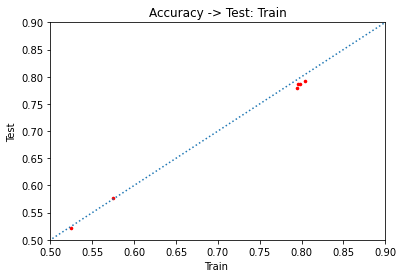

In [74]:
plt.scatter(x2, y2, c = 'red',
            linewidths = 2,
            marker =".",
            s = 10)
plt.plot (x3, y3, linestyle=':')

plt.xlim([0.5, 0.9])
plt.ylim([0.5, 0.9])
plt.title('Accuracy -> Test: Train')
plt.xlabel("Train ")
plt.ylabel("Test")
plt.show()

In [75]:
df_losacc['perc_acc'] = ((df_losacc['train_acc'] - df_losacc['test_acc'])/ df_losacc['test_acc']) * 100
df_losacc['perc_loss'] = ((df_losacc['train_loss'] - df_losacc['test_loss'])/ df_losacc['test_loss']) * 100

Text(0.5, 1.0, 'Percentage Difference for Accuracy ')

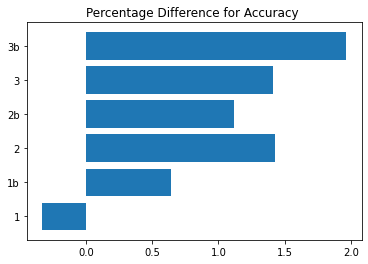

In [76]:
plt.barh(df_losacc.index, df_losacc['perc_acc'] )
plt.title('Percentage Difference for Accuracy ')

Text(0.5, 1.0, 'Percentage Difference for Loss ')

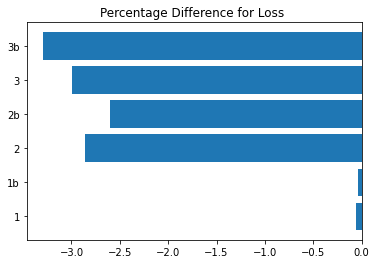

In [77]:
plt.barh(df_losacc.index, df_losacc['perc_loss'] )
plt.title('Percentage Difference for Loss ')

Correlation between the prediction datasets: 

In [93]:
predictions = model1b.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [95]:
print(predictions.shape)
print(predictions2.shape)

(10000, 10)
(10000, 10)


In [104]:
pred1=[]
pred2=[]
pred3=[]
actual=[]
print(predictions.shape)

for i in range(0, 10000, 1):
    pred1.append(np.argmax(predictions[i]))
    pred2.append(np.argmax(predictions2[i]))
    pred3.append(np.argmax(predictions3[i]))
    imageno.append(i)
    actual.append(test_labels[i])

actarr = np.array(actual)
print(actarr.shape)
# print(predictions)
# predictions2
# predictions3
# print(np.corrcoef(predictions, predictions2))

(10000, 10)
(10000,)


In [105]:
print(np.corrcoef(actarr, pred1))
print(np.corrcoef(actarr, pred2))
print(np.corrcoef(actarr, pred3))
print(np.corrcoef(pred1, pred2))
print(np.corrcoef(pred2, pred3))

[[1.         0.77043608]
 [0.77043608 1.        ]]
[[1.         0.84593518]
 [0.84593518 1.        ]]
[[1.         0.84177336]
 [0.84177336 1.        ]]
[[1.         0.80777156]
 [0.80777156 1.        ]]
[[1.         0.95390306]
 [0.95390306 1.        ]]


In [106]:
print(df_losacc)

    train_loss  train_acc  test_loss  test_acc  perc_acc  perc_loss
1     2.036979   0.575283   2.038235    0.5772 -0.332059  -0.061586
1b    2.083264   0.524533   2.084087    0.5212  0.639549  -0.039479
2     0.625844   0.798233   0.644272    0.7870  1.427361  -2.860333
2b    0.639939   0.795500   0.657043    0.7867  1.118593  -2.603183
3     0.604499   0.803900   0.623129    0.7927  1.412894  -2.989784
3b    0.620475   0.795033   0.641629    0.7797  1.966571  -3.296945


In [110]:
from sklearn.metrics import confusion_matrix
 
cm1 = confusion_matrix(actarr,pred1)
cm2 = confusion_matrix(actarr,pred2)
cm3 = confusion_matrix(actarr,pred3)

Histograms of the prediction frequency: 

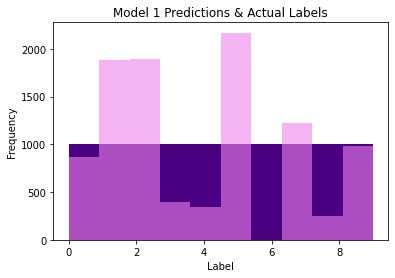

In [138]:
plt.hist(actarr, color="indigo")
plt.hist(pred1, alpha=0.6, color="violet")
plt.title('Model 1 Predictions & Actual Labels')
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show() 

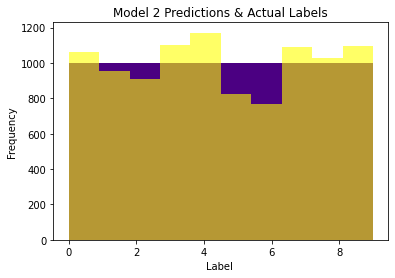

In [140]:
plt.hist(actarr, color="indigo")
plt.hist(pred2, alpha=0.6, color="yellow")
plt.title('Model 2 Predictions & Actual Labels')
plt.xlabel("Label ")
plt.ylabel("Frequency")
plt.show() 

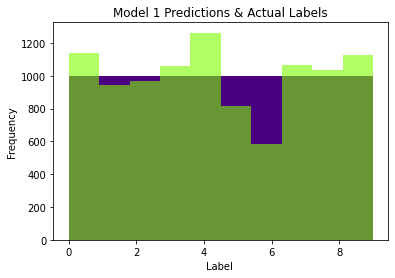

In [141]:
plt.hist(actarr, color="indigo")
plt.hist(pred3, alpha=0.6, color="lawngreen")
plt.title('Model 1 Predictions & Actual Labels')
plt.xlabel("Label ")
plt.ylabel("Frequency")
plt.show() 

Confusion Matrices of the labels and predictions 

In [111]:
print(cm1)
print(cm2)
print(cm3)

[[587 136  81  42   4 145   0   4   1   0]
 [  7 959  17   2   0  15   0   0   0   0]
 [ 10  15 707   3  54 205   0   4   1   1]
 [ 53 602  36 213   2  94   0   0   0   0]
 [ 25  82 572  57 173  87   0   1   2   1]
 [  0   0   0   1   0 847   0 105   0  47]
 [171  80 421  28  56 238   0   3   1   2]
 [  0   0   0   0   0 257   0 729   0  14]
 [  8   5  61  44  53 219   0 206 241 163]
 [  6   0   0   1   0  62   0 175   0 756]]
[[787   8  11  83   8   2  78   0  22   1]
 [  6 920  12  47   9   0   4   0   2   0]
 [ 19   2 624  10 202   1 126   0  16   0]
 [ 39  14   6 845  33   1  58   0   4   0]
 [  0   3 119  47 755   0  69   0   7   0]
 [  1   0   0   4   0 774   0 143   6  72]
 [209   5 132  47 162   3 404   0  38   0]
 [  0   0   0   0   0  31   0 887   0  82]
 [  2   1   6  16   2   3  27  11 930   2]
 [  0   0   0   1   0   8   0  49   1 941]]
[[811   7  15  68   5   3  65   0  25   1]
 [ 18 917  13  37  13   0   0   0   2   0]
 [ 26   1 642  11 217   0  84   0  18   1]
 [ 36  13

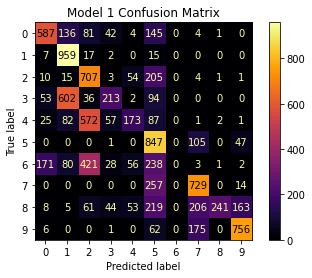

In [161]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1)
cm_display.plot(cmap='inferno')
plt.title('Model 1 Confusion Matrix')
plt.show() 

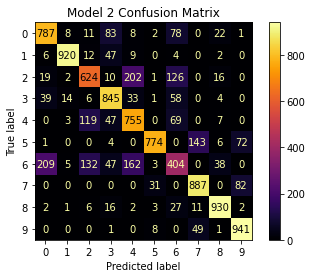

In [162]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2)

cm_display.plot(cmap='inferno')
plt.title('Model 2 Confusion Matrix')
plt.show() 

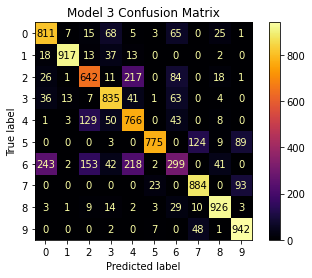

In [163]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3)

cm_display.plot(cmap='inferno')
plt.title('Model 3 Confusion Matrix')
plt.show() 